In [1]:
!pip install numpy pandas scikit-learn matplotlib seaborn


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA


In [3]:
# Load the Iris dataset
iris = load_iris()

# Convert to a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Display basic information about the dataset
print("\nDataset Info:")
df.info()

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   specie

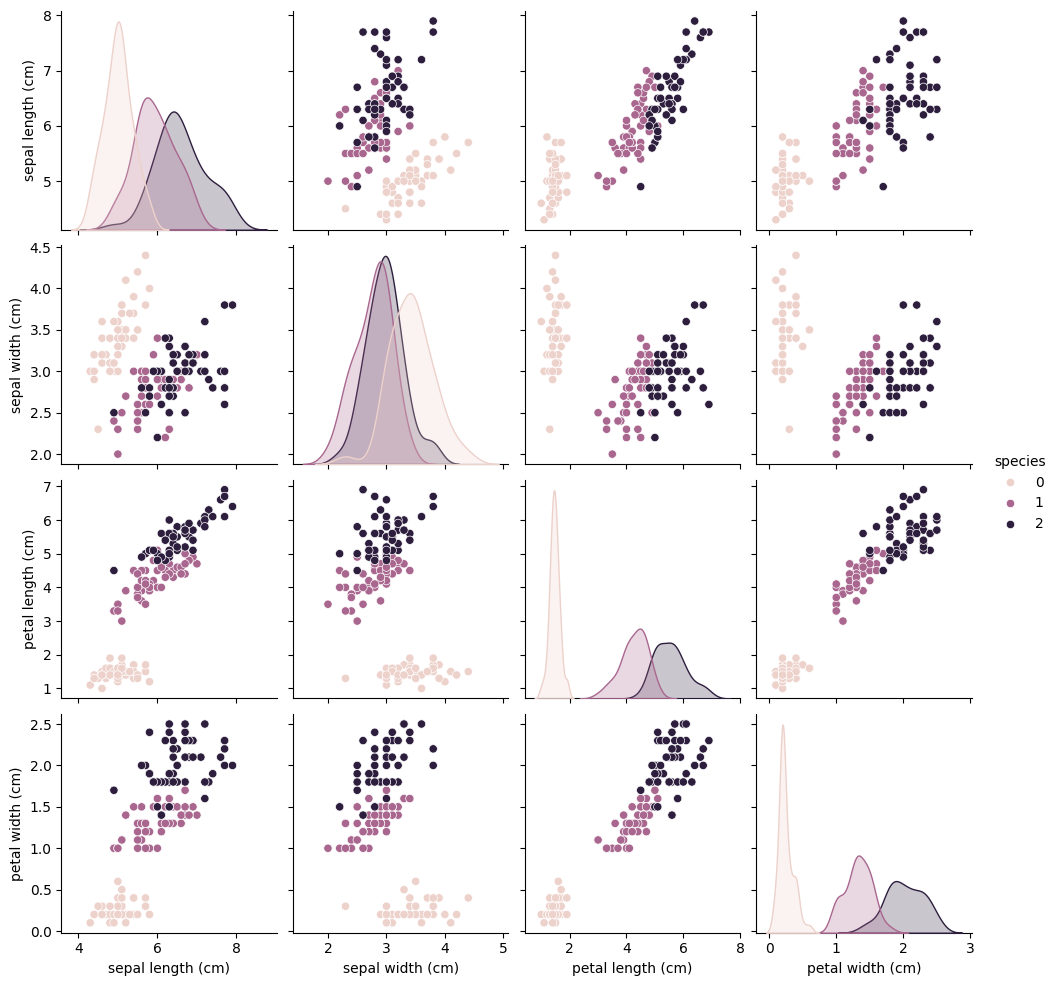

In [4]:
# Pairplot for data visualization
sns.pairplot(df, hue='species', diag_kind='kde')
plt.show()


<ipython-input-5-db49a6d99022>:10: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "bo-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(K, inertia, 'bo-', linestyle='dotted')


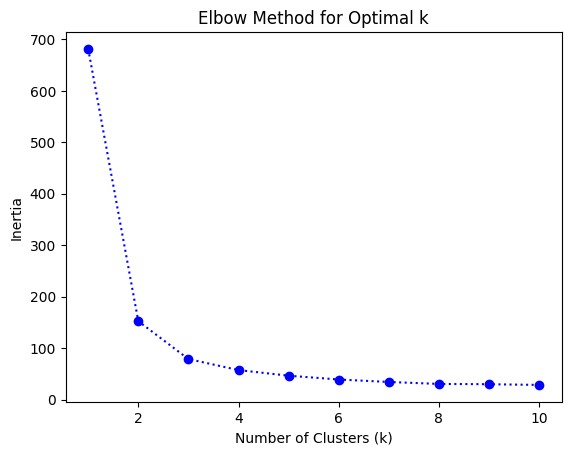

In [5]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris.data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(K, inertia, 'bo-', linestyle='dotted')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [6]:
# Apply K-Means with the chosen number of clusters (k=3 for the Iris dataset)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(iris.data)

# Add the cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

print("\nCluster Labels assigned:")
print(df[['species', 'cluster']].head())



Cluster Labels assigned:
   species  cluster
0        0        1
1        0        1
2        0        1
3        0        1
4        0        1


In [7]:
# Reduce the data to 2 dimensions using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(iris.data)

# Add the reduced dimensions to the DataFrame
df['PCA1'] = reduced_data[:, 0]
df['PCA2'] = reduced_data[:, 1]


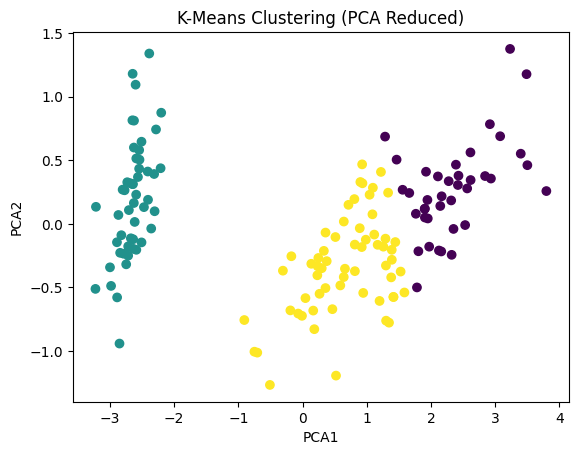

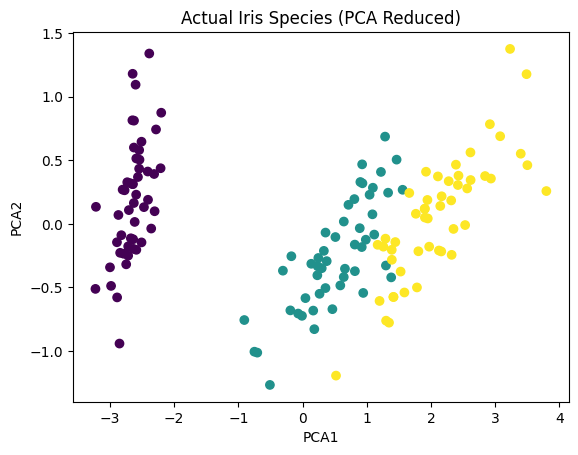

In [8]:
# Plot the clusters formed by K-Means
plt.scatter(df['PCA1'], df['PCA2'], c=df['cluster'], cmap='viridis', marker='o')
plt.title('K-Means Clustering (PCA Reduced)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# Plot the actual species for comparison
plt.scatter(df['PCA1'], df['PCA2'], c=df['species'], cmap='viridis', marker='o')
plt.title('Actual Iris Species (PCA Reduced)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()



Confusion Matrix:
[[ 0 50  0]
 [ 3  0 47]
 [36  0 14]]


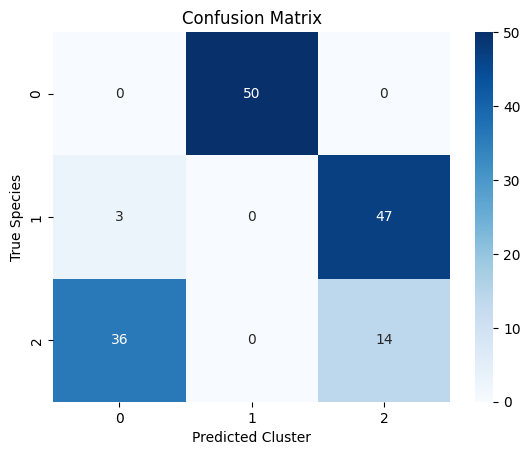

In [9]:
# Compare the cluster labels with actual species labels
conf_matrix = confusion_matrix(df['species'], df['cluster'])

print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Cluster')
plt.ylabel('True Species')
plt.title('Confusion Matrix')
plt.show()


**Summary:**


1.   Data Exploration:
*   Iris dataset contains 150 samples, 4 features (sepal/petal length & width), and 3 species.
*   No missing values.
----

2.   Elbow Method:
*   Optimal number of clusters is 3 (clear bend in the plot at k=3).
----
3.   K-Means Clustering:
*   Applied K-Means with 3 clusters.
*   PCA reduced data plotted shows clear separations.
----
4.   Evaluation:
*   Confusion matrix indicates good alignment with true species labels.
*   Clustering successfully grouped data with some misclassifications.
----
5.   Visualizations:
*   Pairplot for initial exploration.
*   Scatter plots for K-Means clusters and true species.
*   Confusion matrix heatmap.
----







